The Birch builds a tree called the Clustering Feature Tree (CFT) for the given data. The data is essentially lossy compressed to a set of Clustering Feature nodes (CF Nodes). The CF Nodes have a number of subclusters called Clustering Feature subclusters (CF Subclusters) and these CF Subclusters located in the non-terminal CF Nodes can have CF Nodes as children.

In [1]:
# class sklearn.cluster.Birch(*, 
#                             threshold=0.5, 
#                             branching_factor=50, 
#                             n_clusters=3, 
#                             compute_labels=True, 
#                             copy=True)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch

In [3]:
dataset=pd.read_csv("Mall_Customers.csv")
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
X=dataset.iloc[:,[3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

<function matplotlib.pyplot.show(close=None, block=None)>

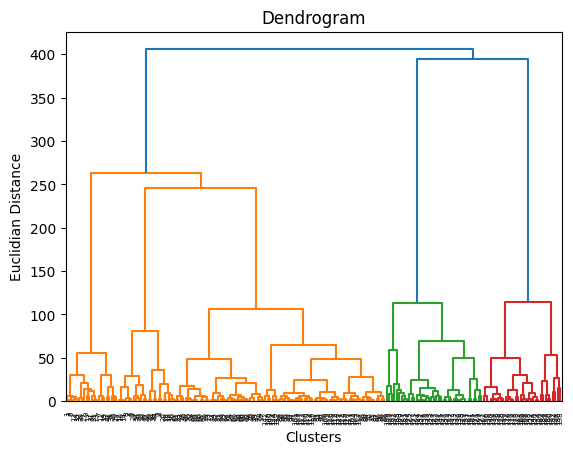

In [5]:
graph=sch.dendrogram(sch.linkage(X,method='ward'))
plt.title("Dendrogram")
plt.xlabel("Clusters")
plt.ylabel("Euclidian Distance")
plt.show

In [6]:
from sklearn.cluster import Birch
birch=Birch(n_clusters=8)
birch_predict=birch.fit_predict(X)
birch_predict

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 7, 7, 7, 7, 7, 3, 7, 3, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 4, 4, 7, 4, 7, 4, 4, 7, 7, 4, 7, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 1, 4, 1, 5, 1, 5, 1,
       4, 1, 5, 1, 5, 1, 5, 1, 5, 1, 4, 1, 5, 1, 4, 1, 5, 1, 5, 1, 5, 1,
       5, 1, 5, 1, 5, 1, 4, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1, 5, 2, 6, 2, 5, 2, 6, 2, 6, 1, 6, 2, 6, 1, 6, 2, 6, 2, 6, 2,
       6, 2], dtype=int64)

In [7]:
supervised=pd.DataFrame(dataset)
supervised['cluster_group']=birch_predict
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster_group
0,1,Male,19,15,39,0
1,2,Male,21,15,81,3
2,3,Female,20,16,6,0
3,4,Female,23,16,77,3
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,6
197,198,Male,32,126,74,2
198,199,Male,32,137,18,6


In [8]:
supervised.to_csv('Birch_cluster.csv',index=False)

In [9]:
supervised['cluster_group'].value_counts()

cluster_group
4    49
7    32
1    30
3    25
0    23
5    23
2     9
6     9
Name: count, dtype: int64

C:\Users\jayac\AppData\Local\anaconda3\envs\aiml\Lib\site-packages\seaborn\regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
C:\Users\jayac\AppData\Local\anaconda3\envs\aiml\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


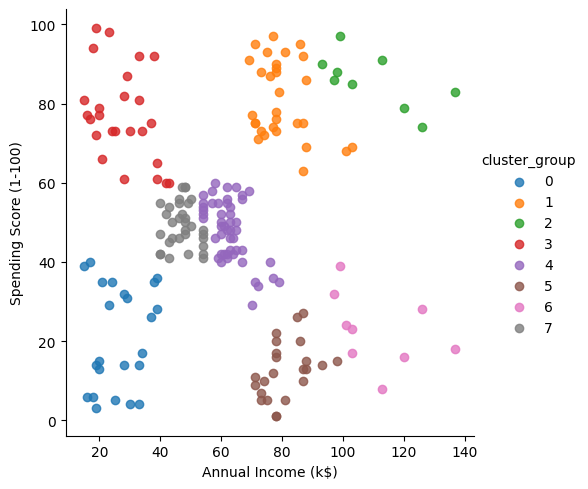

In [10]:
sns_graph=sns.lmplot(data=supervised,
                    x=supervised.columns[3],
                    y=supervised.columns[4],
                    hue=supervised.columns[5],
                    fit_reg=False,
                    legend=True,
                    legend_out=True)